In [6]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import os
import re

### Helper Function

In [7]:
# Function to extract date info from raw data
def extract_date_info_v2(date_str):
    """
    Extracts the month, day, and year from a date string.
    
    Parameters:
    - date_str: A string representing a date in the format "Day Mon DD HH:MM:SS +0000 YYYY"
    
    Returns:
    - A tuple containing the month as a string, day and year as integers.
    """
    # Regular expression to capture the month, day, and year
    match = re.search(r'\w+\s+(\w+)\s+(\d+)\s+\d{2}:\d{2}:\d{2}\s+\+\d{4}\s+(\d{4})', date_str)
    if match:
        month, day, year = match.groups()
        return month, int(day), int(year)
    return None, None, None

In [8]:
# function to combine all raw data into dataframe 
def data_combine(country):
    # read in raw data and combine them into dataframe 
    folder_path = '/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/{country}'.format(country = country)  # Update this to your folder path
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Concatenate all the dataframes in the list
    all_dataframes = [] 
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)
    china_df = pd.concat(all_dataframes, ignore_index=True)

    # Apply to raw data
    china_df['month'], china_df['day'], china_df['year'] = zip(*china_df['created_at'].apply(extract_date_info_v2))

    # drop previous date column 
    china_df1 = china_df.drop(columns=["created_at"])

    # drop duplicate tweets 
    china_df2 = china_df1.drop_duplicates()
    indices_to_drop = china_df2[china_df2['year'] == 2024].index
    china_df3 = china_df2.drop(indices_to_drop)
    china_cleaned = china_df3.sort_values(by=['year','month'],ascending=True)

    # Checking for year and month distribution after remove duplicates
    month_distribution = china_cleaned['month'].value_counts()
    year_distribution = china_cleaned['year'].value_counts()
    print('cleaned year distribution for {country}: '.format(country = country))
    print(year_distribution)
    print('cleaned month distribution for {country}: '.format(country = country))
    print(month_distribution)

    return china_cleaned

### Processing Data

In [9]:
ru_cleaned = data_combine('Russia')
nk_cleaned = data_combine('North_Korean')

cleaned year distribution for Russia: 
2021    1832
2022    1823
2020    1801
2019    1700
2023    1613
2018    1536
Name: year, dtype: int64
cleaned month distribution for Russia: 
Nov    928
Mar    914
Dec    912
Jan    903
May    901
Sep    899
Jun    868
Jul    854
Oct    804
Aug    777
Apr    775
Feb    770
Name: month, dtype: int64
cleaned year distribution for North_Korean: 
2023    1792
2018    1666
2022    1660
2020    1657
2019    1645
2021    1642
Name: year, dtype: int64
cleaned month distribution for North_Korean: 
Dec    899
Nov    896
Feb    895
Mar    895
Jan    893
Sep    893
Aug    886
Jun    766
Apr    765
Jul    764
Oct    764
May    746
Name: month, dtype: int64


In [11]:
# Call the function to read in data 
china_cleaned = data_combine('China')
ir_cleaned = data_combine('Iran')

cleaned year distribution for China: 
2023    2054
2019    1912
2021    1903
2018    1870
2022    1863
2020    1750
Name: year, dtype: int64
cleaned month distribution for China: 
Dec    1185
Jun    1041
Sep     997
Mar     977
Oct     926
Feb     921
Apr     917
Nov     910
Aug     900
Jan     900
May     900
Jul     778
Name: month, dtype: int64
cleaned year distribution for Iran: 
2023    1813
2019    1800
2021    1800
2022    1800
2018    1755
2020    1742
Name: year, dtype: int64
cleaned month distribution for Iran: 
Apr    900
Aug    900
Dec    900
Feb    900
Jul    900
Jun    900
Mar    900
Nov    900
Oct    900
Sep    900
Jan    855
May    855
Name: month, dtype: int64


In [39]:
china_cleaned['year'].value_counts()

2023    2054
2019    1912
2021    1903
2018    1870
2022    1863
2020    1750
Name: year, dtype: int64

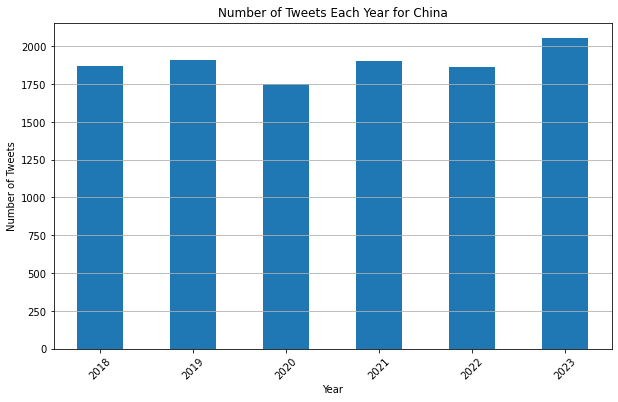

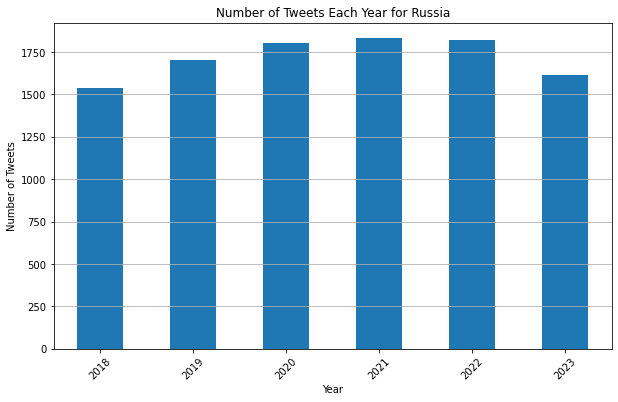

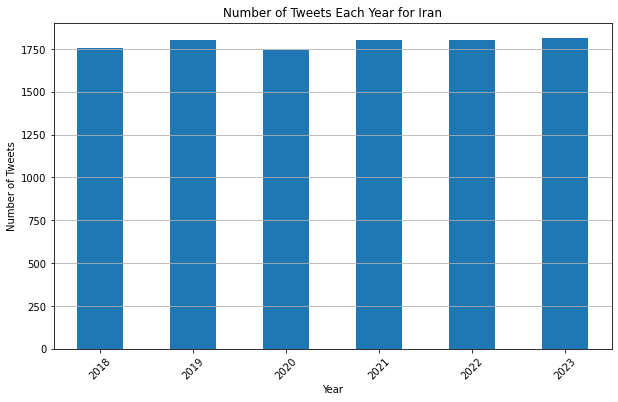

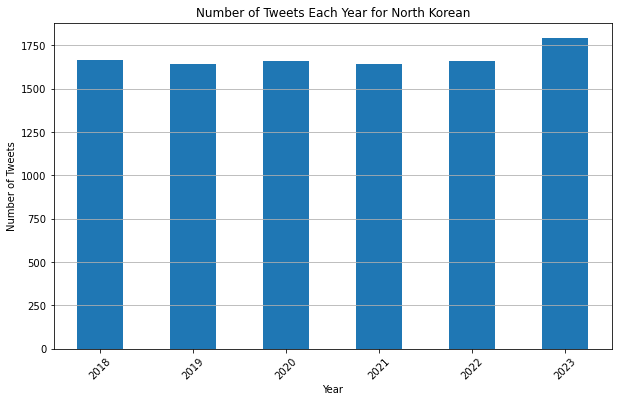

In [12]:
def visualize_tweets_per_year(dataframe, title):
    """
    Visualize the number of tweets per year.
    
    Parameters:
    - dataframe: pandas DataFrame with a 'year' column.
    - title: str, title for the plot indicating the dataset being visualized.
    """
    tweets_per_year = dataframe['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    tweets_per_year.plot(kind='bar')
    
    plt.title(f'Number of Tweets Each Year for {title}')
    plt.xlabel('Year')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Assuming you have four DataFrames: df1, df2, df3, df4
# And corresponding titles for these DataFrames
dataframes_and_titles = [
    (china_cleaned, 'China'),
    (ru_cleaned, 'Russia'),
    (ir_cleaned, 'Iran'),
    (nk_cleaned, 'North Korean')
]

# Looping through each DataFrame and its title, and visualizing the year distribution
for dataframe, title in dataframes_and_titles:
    visualize_tweets_per_year(dataframe, title)


In [6]:
# save the cleaned data into csv file
ir_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/iran_cleaned.csv")
china_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/china_cleaned.csv")

In [13]:
nk_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/northkorean_cleaned.csv")
ru_cleaned.to_csv("/Users/chris/Desktop/Thesis/public_opinion_thesis/Data/russia_cleaned.csv")